### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\ineuron\class demo\Regression project\gem price pred\notebooks\data\gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
# drop ID colum because of no use in our project

# or we can use id for indexing perpose

df = df.drop(labels="id", axis=1)

In [6]:
# check for null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [8]:
# check duplicate
df.duplicated().sum()

0

In [9]:
# to drop duplicates
df = df.drop_duplicates()

In [10]:
# spliting to numerical and catagorical column
df.info()

# as per details we can split

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


In [11]:
## segregate numerical and categorical columns

# numerical_columns=df.columns[df.dtypes!='object']
# categorical_columns=df.columns[df.dtypes=='object']
# print("Numerical columns:",numerical_columns)
# print('Categorical Columns:',categorical_columns)

In [12]:
numerical_columns=df.select_dtypes(["float","int"])
categorical_columns=df.select_dtypes("object")
print("Numerical columns:",numerical_columns.columns)
print('Categorical Columns:',categorical_columns.columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [13]:
print(numerical_columns.describe())
print(numerical_columns.count())

               carat          depth          table              x  \
count  193573.000000  193573.000000  193573.000000  193573.000000   
mean        0.790688      61.820574      57.227675       5.715312   
std         0.462688       1.081704       1.918844       1.109422   
min         0.200000      52.100000      49.000000       0.000000   
25%         0.400000      61.300000      56.000000       4.700000   
50%         0.700000      61.900000      57.000000       5.700000   
75%         1.030000      62.400000      58.000000       6.510000   
max         3.500000      71.600000      79.000000       9.650000   

                   y              z          price  
count  193573.000000  193573.000000  193573.000000  
mean        5.720094       3.534246    3969.155414  
std         1.102333       0.688922    4034.374138  
min         0.000000       0.000000     326.000000  
25%         4.710000       2.900000     951.000000  
50%         5.720000       3.530000    2401.000000  
75%    

In [14]:
print(categorical_columns.describe())
print(categorical_columns.count())

           cut   color clarity
count   193573  193573  193573
unique       5       7       8
top      Ideal       G     SI1
freq     92454   44391   53272
cut        193573
color      193573
clarity    193573
dtype: int64


In [15]:
# values inside each column

# categorical_columns["cut"].value_counts()

for i in categorical_columns:
    print(categorical_columns[i].value_counts())
    print("-"*50)
    


Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64
--------------------------------------------------
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64
--------------------------------------------------
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64
--------------------------------------------------


plotting numerical data as graph

In [16]:
import seaborn as sns
import matplotlib.pylab as plt

# setting figure size
plt.figure(figsize=(8,6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

column name: carat


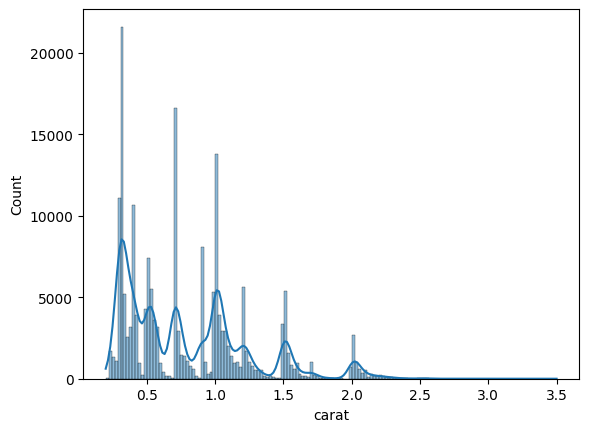

-------------------------------------------------- 

column name: depth


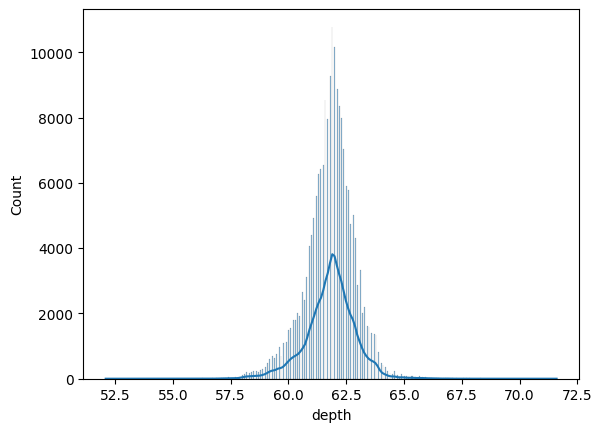

-------------------------------------------------- 

column name: table


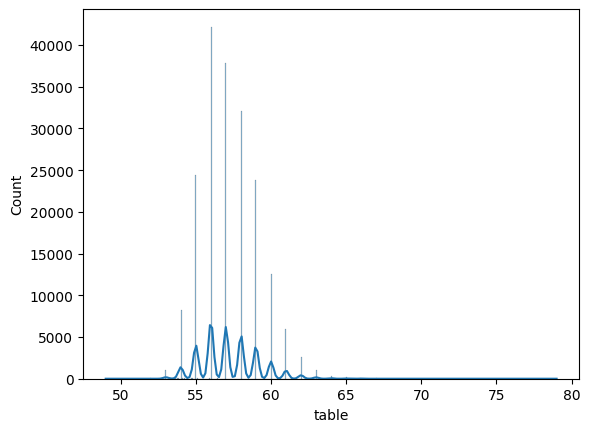

-------------------------------------------------- 

column name: x


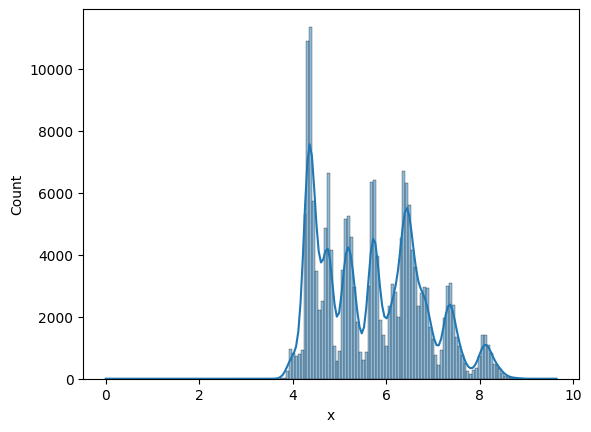

-------------------------------------------------- 

column name: y


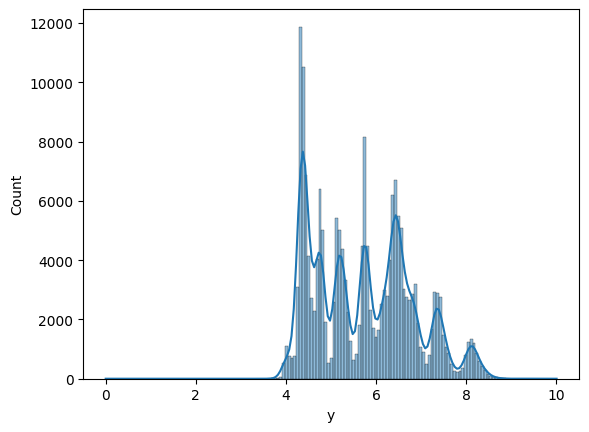

-------------------------------------------------- 

column name: z


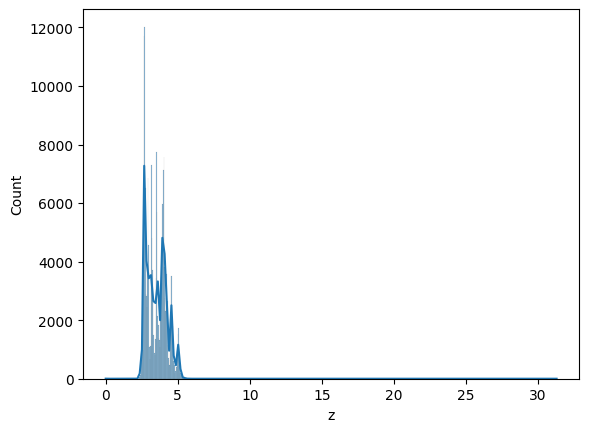

-------------------------------------------------- 

column name: price


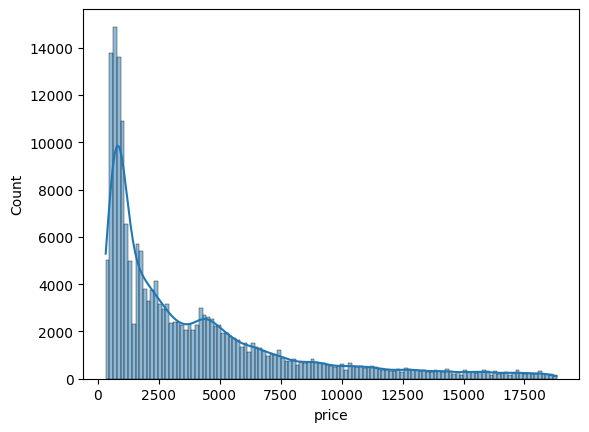

-------------------------------------------------- 



In [17]:
for i in numerical_columns:
    print("column name:",i)
    sns.histplot(data=numerical_columns[i],kde=True)
    plt.show()
    print("-"*50,"\n")
    

In [20]:
categorical_columns["clarity"].

0          VS2
1          SI2
2          VS1
3          VS1
4          VS2
          ... 
193568    VVS2
193569    VVS2
193570     SI1
193571     SI1
193572     SI2
Name: clarity, Length: 193573, dtype: object

<Axes: xlabel='price', ylabel='clarity'>

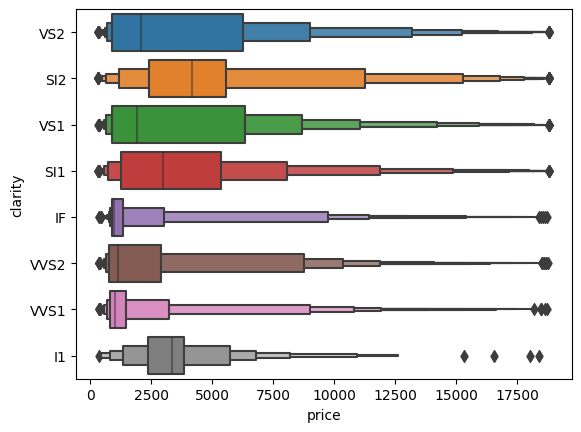

In [27]:
# for categorical data

sns.boxenplot(data=df, x="price", y="clarity")

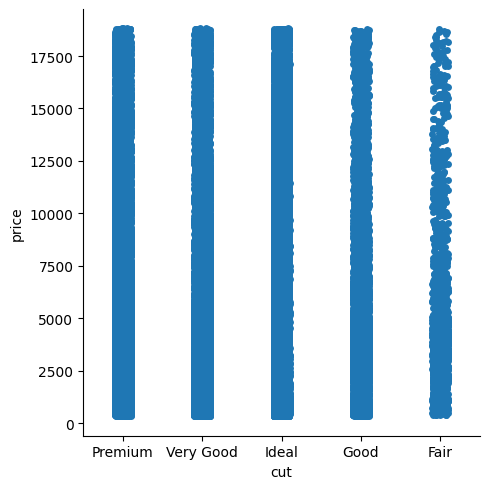

In [32]:
sns.catplot(data=df, x="cut",y="price")

plot for cut and price


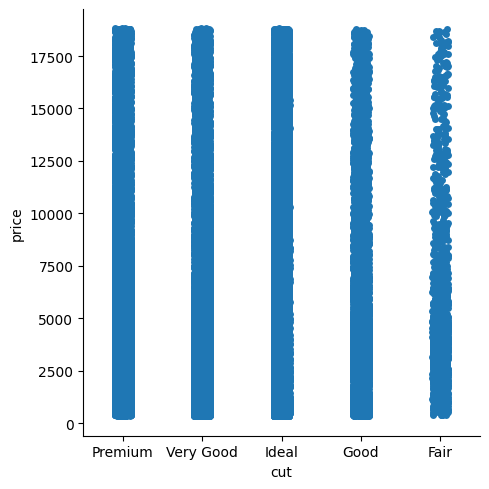

-------------------------------------------------- 

plot for color and price


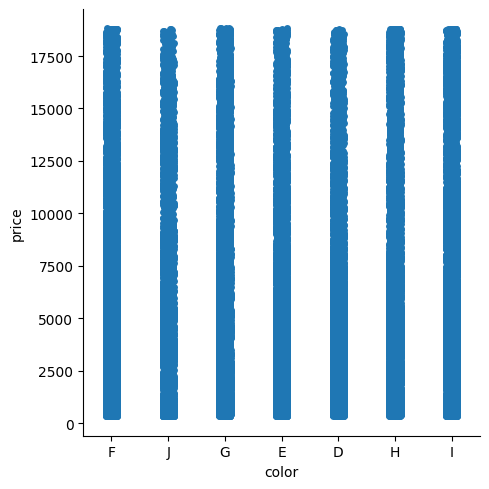

-------------------------------------------------- 

plot for clarity and price


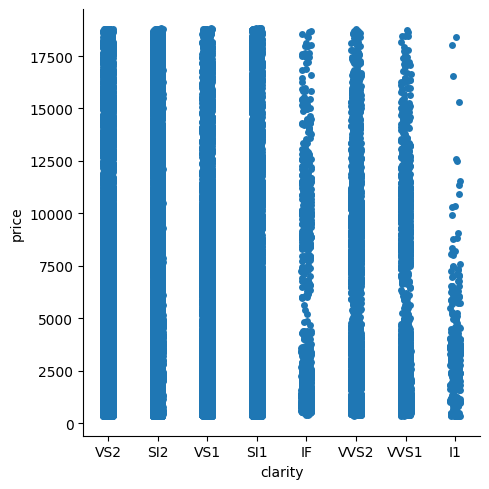

-------------------------------------------------- 



In [35]:
for i in categorical_columns:
    print(f"plot for {i} and price")
    sns.catplot(x=categorical_columns[i],y=numerical_columns["price"])
    plt.show()
    print("-"*50,"\n")

plot for cut and depth


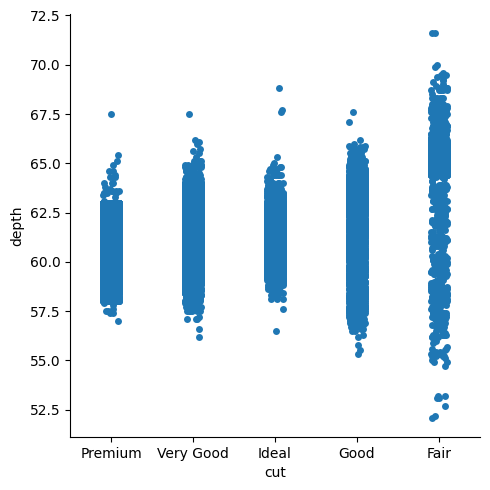

-------------------------------------------------- 

plot for color and depth


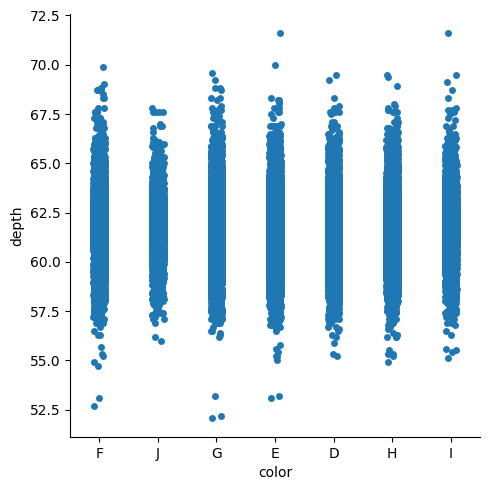

-------------------------------------------------- 

plot for clarity and depth


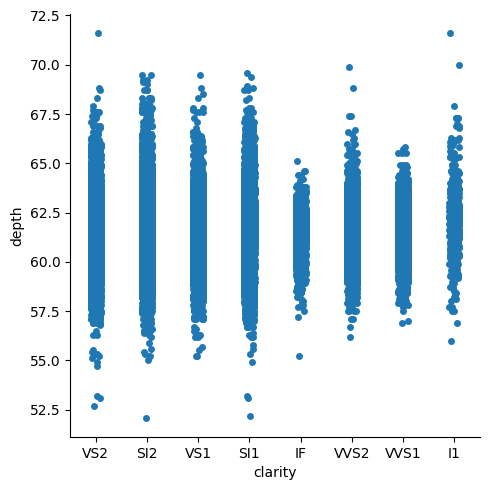

-------------------------------------------------- 



In [37]:
for i in categorical_columns:
    print(f"plot for {i} and depth")
    sns.catplot(x=categorical_columns[i],y=numerical_columns["depth"])
    plt.show()
    print("-"*50,"\n")

plot for cut and carat


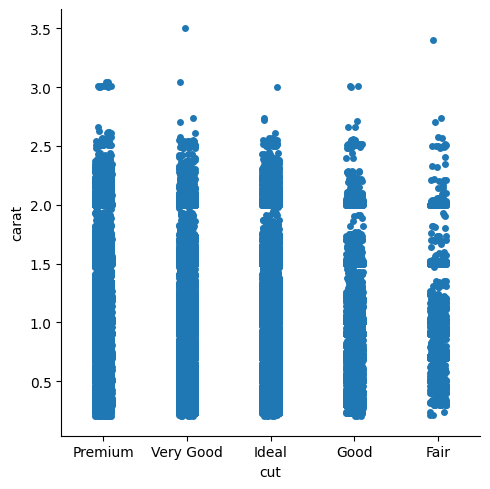

-------------------------------------------------- 

plot for color and carat


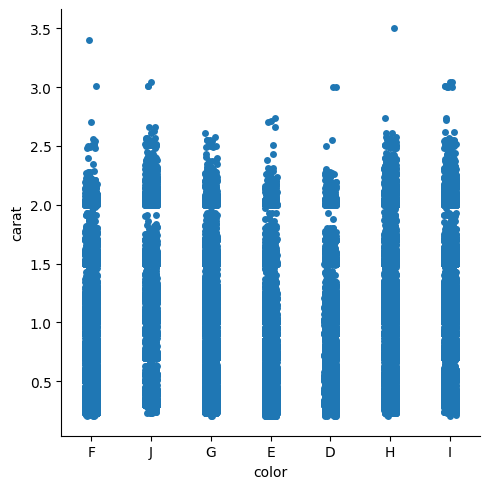

-------------------------------------------------- 

plot for clarity and carat


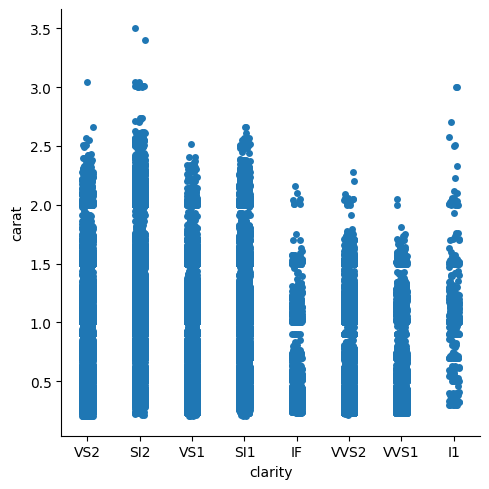

-------------------------------------------------- 



In [38]:
for i in categorical_columns:
    print(f"plot for {i} and carat")
    sns.catplot(x=categorical_columns[i],y=numerical_columns["carat"])
    plt.show()
    print("-"*50,"\n")

Correlation

C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_26840\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

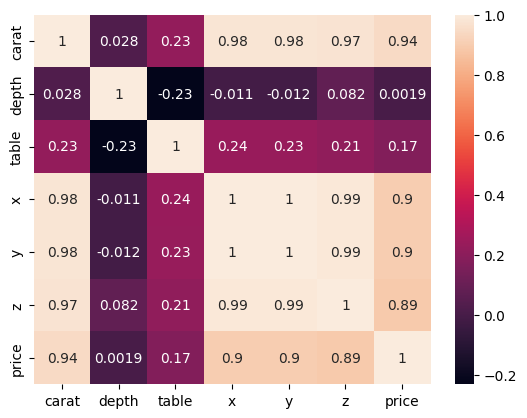

In [39]:
sns.heatmap(df.corr(),annot=True)

In [41]:
# observation - x,y & z are un-necessary objects of this dataset and will create problem of over fitting
# the x y and z show high relation ship between each other too but doesnt have that much impact in real world. Because we already have depth and caret for that details

##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

In [44]:
# processing categorical_columns data
for i in categorical_columns:
    print("column",i, ":",categorical_columns[i].unique(),"\n")

column cut : ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair'] 

column color : ['F' 'J' 'G' 'E' 'D' 'H' 'I'] 

column clarity : ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1'] 



now we have to conecvert these to numirical data as per weight that we can assign as per convience.

ideally higher number is higher rank for this problem statement like ideal gem stone is ranked as highest among other and fair will be ranked as 1

but this will differ for class rank system

In [46]:
# mapping weight to the data in key walue pair
# domain exper will give this details but general understanding can be developed via internet

cut_map = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [49]:
df_copy = df
df_copy.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [50]:
df["cut"] = df["cut"].map(cut_map)

In [51]:
df["clarity"] = df["clarity"].map(clarity_map)

In [52]:
df["color"] = df["color"].map(color_map)

In [55]:
# all data is in numerical now

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int64  
 2   color    193573 non-null  int64  
 3   clarity  193573 non-null  int64  
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 20.3 MB


In [57]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387


In [66]:
df.to_csv("clean_file_EDA.csv")

# Model training

In [357]:
df = pd.read_csv(r"D:\ineuron\class demo\Regression project\gem price pred\notebooks\data\gemstone.csv")

In [358]:
df=df.drop(labels="id",axis=1)

In [359]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


# Independent and dependent features

independent is the one which we have to use to predict the dependent variable like in this case price is what we have to predict; denoted generally as X

and dependent is the variable which we have to predict by considering the relative data along with it in the dataset; denoeted generally as y

In [360]:
#splitting the data in X and y

X = df.drop(labels="price",axis=1)

y = df[["price"]]

In [361]:
X.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05


In [362]:
y.head(2)

,price
0,13619
1,13387


In [363]:
# define column that should be ordinal - encoded and which should be scaled

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [364]:
categorical_columns,"\n",numerical_columns

(Index(['cut', 'color', 'clarity'], dtype='object'),
 '\n',
 Index(['price'], dtype='object'))

In [365]:
# cut_categories = [i for i in df["cut"].unique()]
# clarity_categories = [i for i in df["clarity"].unique()]
# color_categories = [i for i in df["color"].unique()]

# this will not work but can be used to extract the values

## make sure to create a list as per order 
## super important

In [366]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [367]:
cut_categories,clarity_categories,color_categories


(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
 ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
 ['D', 'E', 'F', 'G', 'H', 'I', 'J'])

import machine learning libraries

In [368]:
# to handel missing values
from sklearn.impute import SimpleImputer 

# to handel feature scaling
from sklearn.preprocessing import StandardScaler

# for ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

In [369]:
# to build pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical pipeline

In [370]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)


categorical pipeline

In [371]:
# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

executing through preprocessor variale / object


this is to automate the process uinsg buildin functions

In [372]:
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


## train test split

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=30)

In [375]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
168192,0.34,Ideal,I,VVS2,60.9,57.0,4.56,4.53,2.76
35202,0.90,Good,E,SI1,63.8,57.0,6.07,6.03,3.87
41091,1.02,Premium,G,VS1,62.7,58.0,6.35,6.39,4.00
31239,0.32,Premium,G,VS2,62.1,59.0,4.37,4.35,2.71
45722,0.35,Ideal,J,VVS2,61.1,56.0,4.53,4.57,2.78


In [376]:
# pushing data to pipeline
# for train only u use fit transfrom and for test data it will be transform only


In [377]:
# pd.DataFrame(preprocessor.fit_transform(X_train),columns = preprocessor.get_feature_names_out()).head()

In [378]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

# Model training

In [379]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [380]:
regression = LinearRegression() # object of model

regression.fit(X_train,y_train)

LinearRegression()

In [381]:
regression.coef_

array([[ 6433.66003594,  -132.75843566,   -70.42922179, -1720.30971463,
         -499.29302619,   -63.39317848,    72.44537247,  -460.41604642,
          650.76431652]])

In [382]:
regression.intercept_

array([3970.76628955])

automate the steps to get best model that performance

In [383]:
import numpy as np

In [428]:
def evaluate_model(true,predict):
    mae = mean_absolute_error(true,predict)
    msa = mean_squared_error(true,predict)
    r2 = r2_score(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    return mae, msa, rmse, r2


# train multiple models

In [458]:
# model dictonary
models_dict={ 
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" : ElasticNet()
}

In [459]:
# empty variables

train_model_list = list()
model_list = dict()
r2_list = list()

In [460]:
# loops 

for i in models_dict.values():
    models = i
    models.fit(X_train,y_train)

    # predictions
    y_pred  = models.predict(X_test)

    mae, msa, rmse, r2_square=evaluate_model(y_test,y_pred)
    
    print("Model name : ", i)
    print("---"*10)

    
    print('Model Training Performance')
    print("- - - "*5)
    print("RMSE:",rmse)
    print("MSA:",msa)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    r2_list.append(r2_square*100)
    print("- - - "*5)
    print('='*35)
    print('\n')
    model_list[i]=(r2_square*100)

    
    






Model name :  LinearRegression()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 1013.9047094344004
MSA: 1028002.7598132559
MAE: 674.0255115796832
R2 score 93.68908248567512
- - - - - - - - - - - - - - - 


Model name :  Lasso()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 1013.8784226767013
MSA: 1027949.4559693959
MAE: 675.0716923362162
R2 score 93.68940971841704
- - - - - - - - - - - - - - - 


Model name :  Ridge()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 1013.9059272771649
MSA: 1028005.2293677676
MAE: 674.0555800798198
R2 score 93.68906732505937
- - - - - - - - - - - - - - - 


Model name :  ElasticNet()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 1533.416245606405
MSA: 2351365.3822896425
MAE: 1060.7368759154729
R2 score 85.56494831165182
- - - - - - - - - - - - - - - 




In [461]:
for i in model_list:
    if model_list[i]==max(r2_list):
        print(i)
        train_model_list.append((i,model_list[i]))

Lasso()


In [466]:
print([i for i in model_list],"\n",train_model_list,"\n",r2_list)

[LinearRegression(), Lasso(), Ridge(), ElasticNet()] 
 [(Lasso(), 93.68940971841704)] 
 [93.68908248567512, 93.68940971841704, 93.68906732505937, 85.56494831165182]
